In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/drive')

path='/drive/MyDrive/Colab Notebooks/wifi.csv'
df=pd.read_csv(path)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [5]:
df.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [26]:
OHE = pd.get_dummies(df, columns = ['Room'])

X=df.drop('Room',axis=1)
Y=OHE[['Room_1','Room_2','Room_3','Room_4']]

In [7]:
df.isnull().sum()

Wifi 1    0
Wifi 2    0
Wifi 3    0
Wifi 4    0
Wifi 5    0
Wifi 6    0
Wifi 7    0
Room      0
dtype: int64

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2, random_state=0)

In [28]:
from keras.models import Sequential
from keras.layers import Dense

L1=100
L2=100

model = Sequential()
model.add(Dense(L1,input_dim=7, activation='relu'))
model.add(Dense(L2,activation='relu'))

model.add(Dense(4,activation='softmax'))



In [29]:
model.compile(loss='CategoricalCrossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
Test1=model.fit(X_train,Y_train, epochs=10,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/10
16/16 [==============================] - 1s 18ms/step - loss: 3.0807 - accuracy: 0.3613 - val_loss: 1.0963 - val_accuracy: 0.4850
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5886 - accuracy: 0.7713 - val_loss: 0.3985 - val_accuracy: 0.8500
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.9119 - val_loss: 0.2862 - val_accuracy: 0.9150
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9450 - val_loss: 0.2054 - val_accuracy: 0.9425
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9594 - val_loss: 0.1711 - val_accuracy: 0.9575
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1492 - accuracy: 0.9656 - val_loss: 0.1606 - val_accuracy: 0.9725
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9700 - val_loss: 0.1463 - val_accuracy: 0.9675
Epoch 8/10
16/16 [=

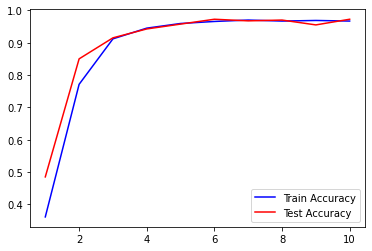

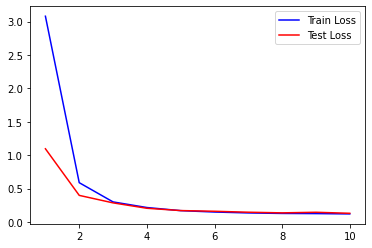

In [31]:
acc2 = Test1.history['accuracy']
val_acc = Test1.history['val_accuracy']
loss2 = Test1.history['loss']
val_loss= Test1.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()